In [2]:
pip install Scikit-Fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Scikit-Fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=219241ab5e56248f8cce6856fa7f7b0522ddaac54ab733157ae0fd8467ad7e6b
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built Scikit-Fuzzy


In [11]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


time = ctrl.Antecedent(np.arange(10,181,10),'TIME')   
mass = ctrl.Antecedent(np.arange(200,1001,100),'MASS')
power = ctrl.Consequent(np.arange(10,101,10),'POWER')


38.768115942028984
65.79579579579581


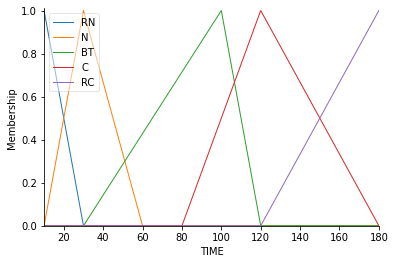

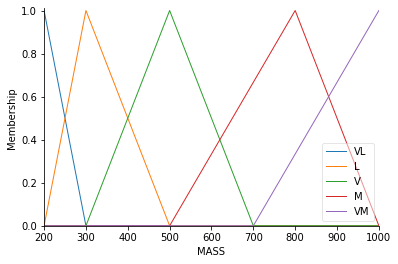

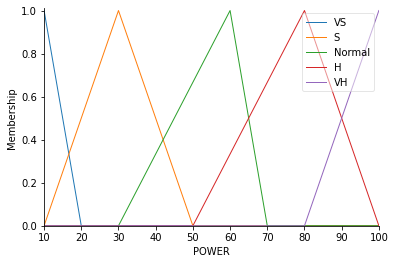

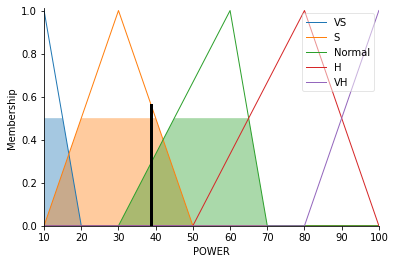

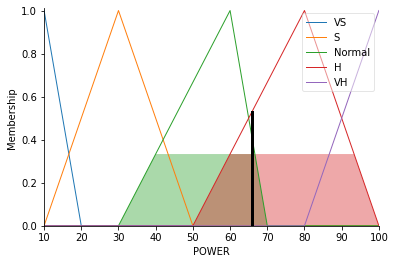

In [15]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


time = ctrl.Antecedent(np.arange(10,181,10),'TIME')   
mass = ctrl.Antecedent(np.arange(200,1001,100),'MASS')
power = ctrl.Consequent(np.arange(10,101,10),'POWER')


time['RN'] = fuzz.trimf(time.universe,[10,10,30])                   #very fast
time['N'] = fuzz.trimf(time.universe,[10,30,60])                  # fast
time['BT'] = fuzz.trimf(time.universe,[30,100,120])                  #normal              
time['C'] = fuzz.trimf(time.universe,[80,120,180])                #slow
time['RC'] = fuzz.trimf(time.universe,[120,180,180])              #very slow

mass['VL'] = fuzz.trimf(mass.universe,[200,200,300])             #very less
mass['L'] = fuzz.trimf(mass.universe,[200,300,500])   #less
mass['V'] = fuzz.trimf(mass.universe,[300,500,700])    #(normal)
mass['M'] = fuzz.trimf(mass.universe,[500,800,1000])    #much
mass['VM'] = fuzz.trimf(mass.universe,[700,1000,1000])   #verymuch


power['VS'] = fuzz.trimf(power.universe,[10,10,20])  #very small
power['S'] = fuzz.trimf(power.universe,[10,30,50])  #small
power['Normal'] = fuzz.trimf(power.universe,[30,60,70])
power['H'] = fuzz.trimf(power.universe,[50,80,100])  #High
power['VH'] = fuzz.trimf(power.universe,[80,100,100]) #Veryhigh power
time.view()
mass.view()
power.view()


rule1 = ctrl.Rule(time['RN']&mass['VL'],power['Normal'])
rule2 = ctrl.Rule(time['N']&mass['VL'],power['S'])
rule3 = ctrl.Rule(time['BT']&mass['VL'],power['S'])
rule4 = ctrl.Rule(time['C']&mass['VL'],power['VS'])
rule5 = ctrl.Rule(time['RC']&mass['VL'],power['VS'])


rule6 = ctrl.Rule(time['RN']&mass['L'],power['H'])
rule7 = ctrl.Rule(time['N']&mass['L'],power['Normal'])
rule8 = ctrl.Rule(time['BT']&mass['L'],power['Normal'])
rule9 = ctrl.Rule(time['C']&mass['L'],power['S'])
rule10 = ctrl.Rule(time['RC']&mass['L'],power['VS'])

rule11 = ctrl.Rule(time['RN']&mass['V'],power['H'])
rule12 = ctrl.Rule(time['N']&mass['V'],power['Normal'])
rule13 = ctrl.Rule(time['BT']&mass['V'],power['Normal'])
rule14 = ctrl.Rule(time['C']&mass['V'],power['S'])
rule15 = ctrl.Rule(time['RC']&mass['V'],power['S'])

rule16 = ctrl.Rule(time['RN']&mass['M'],power['VH'])
rule17 = ctrl.Rule(time['N']&mass['M'],power['H'])
rule18 = ctrl.Rule(time['BT']&mass['M'],power['H'])
rule19 = ctrl.Rule(time['C']&mass['M'],power['Normal'])
rule20 = ctrl.Rule(time['RC']&mass['M'],power['Normal'])

rule21 = ctrl.Rule(time['RN']&mass['VM'],power['VH'])
rule22 = ctrl.Rule(time['N']&mass['VM'],power['VH'])
rule23 = ctrl.Rule(time['BT']&mass['VM'],power['H'])
rule24 = ctrl.Rule(time['C']&mass['VM'],power['H'])
rule25 = ctrl.Rule(time['RC']&mass['VM'],power['Normal'])


power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(power_ctrl)

powering.input['TIME']=100
powering.input['MASS']=250
powering.compute()



print(powering.output['POWER'])
power.view(sim=powering)


powering.input['TIME']=50
powering.input['MASS']=600
powering.compute()

print(powering.output['POWER'])
power.view(sim=powering)

